# **Linear Regression**  
### *Regresja liniowa*

---

## **English**

We begin our exploration of linear regression with the simplest form: fitting a straight line to a set of data points. This model assumes a linear relationship of the form:

$$
y = ax + b,
$$

where $a$ represents the slope of the line, and $b$ is the intercept (the point where the line crosses the $y$-axis). To illustrate this, consider a sample dataset that is scattered around a line with a slope of 3 and an intercept of 4. Although individual observations do not fall exactly on the line, they cluster around it closely enough to suggest that a straight-line model accurately captures the underlying trend.

### **RMSE (Root Mean Square Error)**

One way to measure how well our linear model fits the data is by calculating the Root Mean Square Error (RMSE). It gives us a sense of the average distance between the observed values $(y_i)$ and the model’s predicted values $(\hat{y}_i)$. The RMSE is defined as:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2}.
$$

A lower RMSE indicates a better fit of the model to the data.

### **$R^2$ (Coefficient of Determination)**

Another popular metric for evaluating a linear regression model is the coefficient of determination, denoted as $R^2$. It measures the proportion of variance in the dependent variable (the $y$ values) that is predictable from the independent variable (the $x$ values). 

A commonly used formula for $R^2$ is:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}\bigl(y_i - \hat{y}_i\bigr)^2}{\sum_{i=1}^{n}\bigl(y_i - \overline{y}\bigr)^2},
$$

where:
- $\overline{y}$ is the mean of all observed $y_i$,
- $\hat{y}_i$ is the predicted value for the $i$-th observation.

A value of $R^2$ close to 1 suggests that the model explains the variability in the data well.  
Conversely, the quantity $(1 - R^2)$ represents the proportion of variance **not** explained by the model (sometimes referred to as the *coefficient of non-determination* or *coefficient of alienation*).

---

## **Polish**

Rozpocznijmy naszą przygodę z regresją liniową od najprostszego przypadku: dopasowania prostej do zbioru punktów. W tym ujęciu zakładamy liniową zależność opisaną równaniem:

$$
y = ax + b,
$$

gdzie $a$ to nachylenie prostej, a $b$ jest wyrazem wolnym (punktem przecięcia prostej z osią $y$). Aby to zilustrować, przyjrzyjmy się przykładowemu zbiorowi danych, którego punkty są rozproszone wokół prostej o nachyleniu 3 i wyrazie wolnym 4. Choć pojedyncze obserwacje nie pokrywają się dokładnie z linią, układają się na tyle blisko, by można było uznać, że model liniowy dobrze opisuje obserwowany trend.

### **RMSE (Pierwiastek błędu średniokwadradowego)**

Jednym ze sposobów oceny jakości dopasowania modelu liniowego do danych jest obliczenie tzw. pierwiastka błędu średniokwadratowego (RMSE, ang. Root Mean Square Error). Pozwala on oszacować średnią odległość między wartościami obserwowanymi $(y_i)$ a wartościami przewidywanymi przez model $(\hat{y}_i)$. RMSE definiuje się następująco:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2}.
$$

Niższa wartość RMSE oznacza lepsze dopasowanie modelu do danych.

### **$R^2$ (współczynnik determinacji)**

Innym popularnym wskaźnikiem do oceny regresji liniowej jest współczynnik determinacji, oznaczany jako $R^2$. Określa on, jaka część zmienności zmiennej zależnej ($y$) może zostać wyjaśniona przez zmienną niezależną ($x$). 

Najczęściej korzysta się z następującego wzoru:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}\bigl(y_i - \hat{y}_i\bigr)^2}{\sum_{i=1}^{n}\bigl(y_i - \overline{y}\bigr)^2},
$$

gdzie:
- $\overline{y}$ oznacza średnią ze wszystkich zaobserwowanych wartości $(y_i)$,
- $\hat{y}_i$ to wartość przewidywana przez model dla $i$-tej obserwacji.

Wartość $R^2$ bliska 1 sugeruje, że model dobrze wyjaśnia zmienność w danych.  
Natomiast $(1 - R^2)$ to część zmienności **niewyjaśniona** przez model (bywa nazywana współczynnikiem niedeterminacji lub współczynnikiem alienacji).

Coefficient of slope | Współczynnik nachylenia: 2.97
Intercept | Wyraz wolny: 4.04
RMSE: 0.93
R^2: 0.77


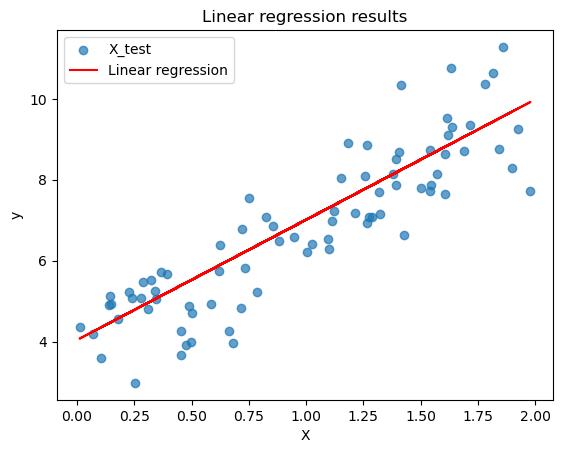

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Generate a simple dataset with noise
# Generowanie prostego zestawu danych z szumem
np.random.seed(42)
X = 2 * np.random.rand(400, 1)
y = 4 + 3 * X + np.random.randn(400, 1)

# Split the data into training and test sets
# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
# Dopasowanie modelu regresji liniowej
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and metrics
# Przewidywania i metryki
y_pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the model parameters
# Wyświetlenie parametrów modelu
print(f"Coefficient of slope | Współczynnik nachylenia: {linear_model.coef_[0][0]:.2f}")
print(f"Intercept | Wyraz wolny: {linear_model.intercept_[0]:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Plot the linear regression line
# Wizualizacja linii regresji
plt.scatter(X_test, y_test, alpha=0.7, label="X_test")
plt.plot(X_test, y_pred, color="red", label="Linear regression")
plt.title("Linear regression results")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Multiple Linear Regression: Higher-Dimensional Fits**  
### *Regresja liniowa wielowymiarowa: dopasowanie hiperplanów*

---

## **English**

In the case of multiple linear regression, our model extends beyond a single predictor and takes the form:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

where there are multiple $x$ values representing different explanatory variables ($x_1, x_2, \ldots$). Geometrically, you can think of this as fitting a plane to data points in three dimensions or, more generally, fitting a hyperplane in higher-dimensional space.

The multidimensional aspect of such regressions makes them harder to visualize than a single straight line or plane. Nevertheless, we can still demonstrate a typical multidimensional fit in action by constructing a sample dataset and using NumPy’s matrix multiplication to generate predictions. This approach allows us to see how the parameters $a_0, a_1, a_2, \dots$ interact with each predictor $x_1, x_2, \dots$ when performing a regression.

### The Normal Equation 
Provides an analytical way to solve for the parameters $\theta$ in a linear regression model without using iterative methods. In matrix form, it is written as:

$$
\theta = (X^T X)^{-1}(X^T y),
$$

where $X$ is the design matrix (including a column of ones for the intercept), and $y$ is the vector of observed values. This method is most practical when the number of features is relatively small, as computing the inverse of $X^T X$ can be expensive for large datasets.

---

## **Polish**

W przypadku wielowymiarowej regresji liniowej nasz model nie ogranicza się do jednego wyjaśniającego $x$, lecz przyjmuje postać:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

gdzie mamy wiele zmiennych objaśniających ($x_1, x_2, \ldots$). Geometrycznie można to porównać do dopasowania płaszczyzny do punktów w przestrzeni trójwymiarowej lub, uogólniając, hiperpłaszczyzny w przestrzeni o jeszcze większej liczbie wymiarów.

Wielowymiarowość takiej regresji sprawia, że wizualizacja wyników jest trudniejsza niż w przypadku prostej dwuwymiarowej prostej lub trójwymiarowej płaszczyzny. Jednak wciąż można pokazać, jak wygląda dopasowywanie modelu do danych, przykładowo poprzez zbudowanie syntetycznego zbioru danych i wykorzystanie funkcji mnożenia macierzowego z biblioteki NumPy do uzyskania przewidywanych wartości. Taka procedura pozwala zaobserwować, w jaki sposób parametry $a_0, a_1, a_2, \dots$ współgrają z poszczególnymi zmiennymi $x_1, x_2, \dots$ w procesie regresji.

### Równania normalne (Normal Equation)
Analityczny sposób wyznaczania parametrów $\theta$ w modelu regresji liniowej, bez konieczności stosowania metod iteracyjnych. W zapisie macierzowym przyjmują postać:

$$
\theta = (X^T X)^{-1}(X^T y),
$$

gdzie $X$ jest macierzą projektu (w tym kolumna jedynek dla wyrazu wolnego), a $y$ to wektor wartości obserwowanych. Metoda ta jest szczególnie przydatna, gdy liczba cech nie jest zbyt duża, ponieważ odwracanie macierzy $X^T X$ może być kosztowne obliczeniowo przy dużych zbiorach danych.

Estimated parameters [a0, a1, a2]: [ 2.71401848  7.95853224 -4.96591078]
True parameters:                   [2.0, 8.0, -4.5]


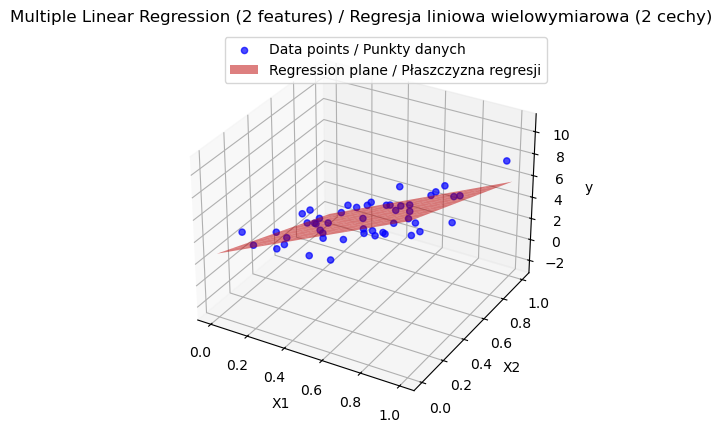

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
# Ustawiamy ziarno losowe (dla powtarzalności wyników)
np.random.seed(0)

# Number of data points
# Liczba punktów danych
N = 50

# Generate two input features, X1 and X2, in [0, 1]
# Generujemy dwie cechy, X1 i X2, w przedziale [0, 1]
X1 = np.random.rand(N)
X2 = np.random.rand(N)

# True parameters of the model (a0, a1, a2)
# Rzeczywiste parametry modelu (a0, a1, a2)
a0_true = 2.0
a1_true = 8.0
a2_true = -4.5

# Add random noise to simulate measurement error
# Dodajemy losowy szum, aby zasymulować błąd pomiaru
noise = 1.2 * np.random.randn(N)

# Create the target values y based on the model equation
#    y = a0 + a1 * X1 + a2 * X2 + noise
# Tworzymy wektor y zgodnie z równaniem:
#    y = a0 + a1 * X1 + a2 * X2 + noise
y = a0_true + a1_true * X1 + a2_true * X2 + noise

# Build the design matrix X (with a column of ones for the intercept)
# Budujemy macierz projektowania (Design Matrix) X
#     (zawiera kolumnę jedynek dla wyrazu wolnego)
X = np.column_stack((np.ones(N), X1, X2))

# Compute parameters using the Normal Equation:
#     theta = (X^T X)^(-1) (X^T y)
# Obliczamy parametry metodą równań normalnych:
#     theta = (X^T X)^(-1) * (X^T y)
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Print the estimated vs. true parameters
# Wypisujemy oszacowane oraz rzeczywiste parametry
print("Estimated parameters [a0, a1, a2]:", theta)
print("True parameters:                  ", [a0_true, a1_true, a2_true])

# Visualization in 3D
# Wizualizacja w 3D
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points in 3D
# Rysujemy oryginalne punkty danych w 3D
ax.scatter(X1, X2, y, color='blue', alpha=0.7, label="Data points / Punkty danych")

# Create a mesh grid to plot the regression plane
# Tworzymy siatkę (meshgrid) do narysowania płaszczyzny regresji
x1_surf, x2_surf = np.meshgrid(np.linspace(0, 1, 10),
                               np.linspace(0, 1, 10))

# Calculate y values on the regression plane
#    y_surface = theta[0] + theta[1]*x1_surf + theta[2]*x2_surf
# Obliczamy wartości y na płaszczyźnie regresji
#    y_surface = theta[0] + theta[1]*x1_surf + theta[2]*x2_surf
y_surf = (theta[0]
          + theta[1] * x1_surf
          + theta[2] * x2_surf)

# Plot the fitted regression plane in red
# Rysujemy dopasowaną płaszczyznę regresji w kolorze czerwonym
ax.plot_surface(x1_surf, x2_surf, y_surf,
                color='red', alpha=0.5,
                label="Regression plane / Płaszczyzna regresji")

# Label the axes
# Ustawiamy etykiety osi
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

plt.title("Multiple Linear Regression (2 features) / Regresja liniowa wielowymiarowa (2 cechy)")

# Show legend (sometimes 3D objects might not display the legend automatically)
# Wyświetlamy legendę (czasami obiekty 3D nie wyświetlają jej automatycznie)
plt.legend()
plt.show()


# **Basis Function Regression / Regresja z funkcjami bazowymi**

## **English**

A simple way to capture nonlinear relationships in a linear regression framework is to transform the original data using **basis functions**. The key idea is to start with a linear model in multiple dimensions:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \dots
$$

and create each $x_i$ by applying a function $f_i$ to the original one-dimensional input $x$:

$$
x_i = f_i(x).
$$

For example, if $f_i(x) = x^i$, the model becomes a polynomial:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots
$$

Although it looks nonlinear in $x$, it remains linear in the parameters $a_i$. By projecting $x$ into a higher-dimensional space, the model can describe more complex patterns in the data.

---

## **Polish**

Aby uchwycić nieliniowe zależności w modelu regresji liniowej, możemy przekształcić dane przy użyciu **funkcji bazowych**. Podstawowa koncepcja polega na tym, że:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \dots
$$

gdzie każde $x_i$ otrzymujemy w wyniku funkcji $f_i(x)$, przetwarzającej wejściowe dane z jednego wymiaru na wiele:

$$
x_i = f_i(x).
$$

Na przykład, przy wyborze $f_i(x) = x^i$, otrzymujemy wielomian:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots
$$

Choć ten model wygląda na nieliniowy w odniesieniu do $x$, wciąż jest liniowy w parametrach $a_i$. Dzięki rzutowaniu $x$ na wyższy wymiar możemy opisać bardziej złożone wzorce w danych.

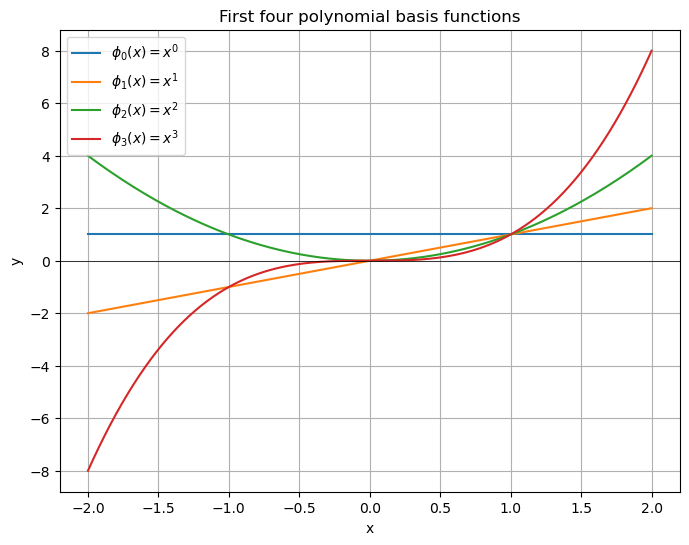

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Zakres osi X
x = np.linspace(-2, 2, 200)

# Tworzymy wykres
plt.figure(figsize=(8, 6))

# Rysujemy kilka pierwszych wielomianowych funkcji bazowych
for i in range(4):
    plt.plot(x, x**i, label=rf'$\phi_{i}(x) = x^{i}$')

plt.title('First four polynomial basis functions')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


# Polynomial Basis Functions / Funkcje Bazowe Wielomianowe

## English

Polynomial projection is a powerful tool for transforming data into a higher-dimensional space. Scikit-Learn provides a built-in transformer for this, called `PolynomialFeatures`.

By applying this transformation, we can use a linear model to fit much more complex relationships between variables $x$ and $y$. The cleanest way to implement this process is by using a **pipeline**.

Let’s construct a 8th-degree polynomial model to demonstrate its capabilities. For this example, we will fit a sine wave with noise, as shown in the following figure.

---

## Polish

Projekcja wielomianowa to potężne narzędzie do transformacji danych do przestrzeni o wyższych wymiarach. Scikit-Learn oferuje wbudowany transformator do tego celu, o nazwie `PolynomialFeatures`.

Stosując tę transformację, możemy użyć modelu liniowego do dopasowania znacznie bardziej złożonych zależności między zmiennymi $x$ i $y$. Najczystszy sposób na wdrożenie tego procesu to wykorzystanie **pipeline**.

Skonstruujmy model wielomianowy 8. stopnia, aby zademonstrować jego możliwości. W tym przykładzie dopasujemy sinusoidę z szumem, jak pokazano na poniższym wykresie.


Polynomial features:
 [[ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]


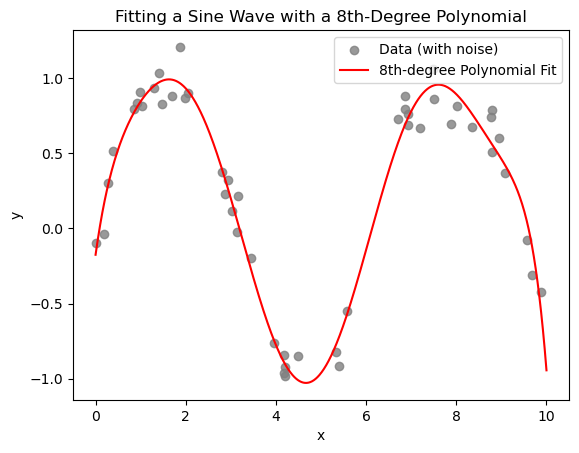

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt


# Creating polynomial basis features (Polynomials of degree 3)
# Tworzymy funkcje bazowe wielomianowe (wielomiany 3. stopnia)
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)  # Degree 3, exclude bias term
poly_features = poly.fit_transform(x[:, None])    # Transform x to higher-dimensional space
print("Polynomial features:\n", poly_features)

# Building a pipeline for 8th-degree polynomial model
# Tworzymy pipeline dla modelu wielomianowego 8. stopnia
poly_model = make_pipeline(PolynomialFeatures(8),  # Transform to 8th-degree polynomial features
                           LinearRegression())     # Fit a linear regression model

# Generating data: a sine wave with noise
# Generujemy dane: funkcja sinusoidalna z szumem
rng = np.random.RandomState(1)       # Random number generator for reproducibility
x = 10 * rng.rand(50)                # Random x values in range [0, 10]
y = np.sin(x) + 0.15 * rng.randn(50)  # y = sin(x) + noise

# Fit the polynomial model to the data
# Dopasowujemy model wielomianowy do danych
poly_model.fit(x[:, np.newaxis], y)

# Generate predictions for a smooth curve
# Generujemy predykcje dla wygładzonej krzywej
xfit = np.linspace(0, 10, 1000)      # x values for prediction
yfit = poly_model.predict(xfit[:, np.newaxis])  # Predicted y values

# Visualizing the data and the fitted model
# Wizualizacja danych i dopasowanego modelu
plt.scatter(x, y, color='gray', alpha=0.8, label="Data (with noise)")  # Data points
plt.plot(xfit, yfit, color='red', label="8th-degree Polynomial Fit")  # Fitted curve
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting a Sine Wave with a 8th-Degree Polynomial")
plt.legend()
plt.show()


# Gaussian Basis Functions / Funkcje Bazowe Gaussa

## English

In addition to polynomial basis functions, there are other useful types of basis functions. One particularly effective approach is to use **Gaussian basis functions**, where the model is expressed not as a sum of polynomial terms but as a sum of Gaussian functions.

The general form of a Gaussian basis function is:

$$
\phi(x; \mu, \sigma) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Here:
- $ \mu $ represents the center of the Gaussian function.
- $ \sigma $ represents the width (standard deviation) of the Gaussian.

Using Gaussian basis functions, a model can be expressed as:

$$
f(x) = \sum_{i=1}^N \theta_i \phi(x; \mu_i, \sigma)
$$

Where:
- $ \phi(x; \mu_i, \sigma) $ is the Gaussian basis function for the $i$-th center.
- $ \theta_i $ are the model coefficients learned during training.

Gaussian basis functions have a **localized influence**, meaning they primarily affect the data near their center. This property allows them to model more complex and non-linear relationships without the oscillations often seen in high-degree polynomial fits.

This approach is especially valuable in cases where the data exhibits local patterns or behaviors that need to be captured accurately.

---

## Polish

Oprócz wielomianowych funkcji bazowych istnieją inne użyteczne rodzaje funkcji bazowych. Jednym z szczególnie skutecznych podejść jest użycie **funkcji bazowych Gaussa**, gdzie model nie jest wyrażony jako suma wielomianów, lecz jako suma funkcji Gaussa.

Ogólna postać funkcji bazowej Gaussa to:

$$
\phi(x; \mu, \sigma) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Gdzie:
- $ \mu $ oznacza centrum funkcji Gaussa.
- $ \sigma $ oznacza szerokość (odchylenie standardowe) Gaussa.

Model oparty na funkcjach bazowych Gaussa można zapisać jako:

$$
f(x) = \sum_{i=1}^N \theta_i \phi(x; \mu_i, \sigma)
$$

Gdzie:
- $ \phi(x; \mu_i, \sigma) $ to funkcja bazowa Gaussa dla $i$-tego centrum.
- $ \theta_i $ to współczynniki modelu wyznaczane podczas trenowania.

Funkcje bazowe Gaussa mają **lokalny wpływ**, co oznacza, że wpływają głównie na dane w pobliżu swojego centrum. Ta właściwość pozwala na modelowanie bardziej złożonych i nieliniowych zależności bez oscylacji często spotykanych w dopasowaniach wielomianów wysokiego stopnia.

Podejście to jest szczególnie przydatne w przypadkach, gdy dane wykazują lokalne wzorce lub zachowania, które wymagają precyzyjnego uchwycenia.


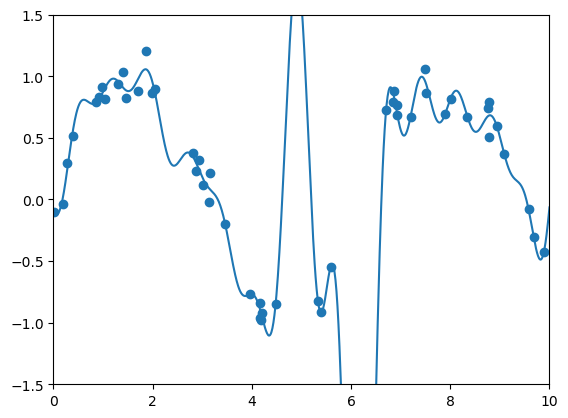

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Uniformly spaced Gaussian features for one-dimensional input.
    Funkcje bazowe Gaussa równomiernie rozmieszczone dla wejścia jednowymiarowego.

    Parameters:
    - N: Number of Gaussian basis functions / Liczba funkcji bazowych Gaussa.
    - width_factor: Scaling factor for the width of the Gaussians /
      Współczynnik skali dla szerokości funkcji Gaussa.
    """

    def __init__(self, N, width_factor=2.0):
        self.N = N  # Number of Gaussian functions / Liczba funkcji bazowych
        self.width_factor = width_factor  # Scaling factor for width / Współczynnik szerokości

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        """
        Compute Gaussian basis function values.
        Oblicz wartości funkcji bazowej Gaussa.

        Parameters:
        - x: Input data points / Punkty wejściowe danych.
        - y: Centers of the Gaussians / Centra Gaussów.
        - width: Width of the Gaussians / Szerokość funkcji Gaussa.
        - axis: Axis over which to sum for multidimensional data /
          Oś, po której sumujemy dla danych wielowymiarowych.

        Returns:
        - Gaussian-transformed values / Przekształcone wartości funkcji Gaussa.
        """
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        """
        Fit the GaussianFeatures transformer by computing centers and widths.
        Dopasowanie transformatora GaussianFeatures przez obliczenie centrów i szerokości.

        Parameters:
        - X: Input data array / Tablica danych wejściowych.
        """
        # Create N centers uniformly spread along the range of X
        # Tworzymy N centrów równomiernie rozmieszczonych w zakresie X
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        
        # Compute the width based on the distance between centers
        # Obliczamy szerokość na podstawie odległości między centrami
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        
        return self

    def transform(self, X):
        """
        Transform the input data into Gaussian basis functions.
        Przekształca dane wejściowe na funkcje bazowe Gaussa.

        Parameters:
        - X: Input data array / Tablica danych wejściowych.

        Returns:
        - Transformed data / Przekształcone dane.
        """
        # Apply Gaussian basis functions for each center
        # Zastosuj funkcje bazowe Gaussa dla każdego centrum
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

# Regularization / Regularyzacja

## Lasso Regression ($L_1$ Regularization) / Regresja Lasso ($L_1$ Regularyzacja)

### English

Lasso regression, also known as *$L_1$ regularization*, is a method of regularization that introduces a penalty proportional to the sum of the absolute values (1-norm) of the regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
This approach not only reduces the risk of overfitting but also promotes simpler models by encouraging sparsity in the coefficients. As a result, lasso regression often sets many of the regression coefficients to exactly zero, effectively selecting only the most relevant features for the model.

---

### Polish

Regresja lasso, znana również jako *regularyzacja $L_1$*, to metoda regularyzacji, która wprowadza karę proporcjonalną do sumy wartości bezwzględnych (norma 1) współczynników regresji:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Podejście to nie tylko zmniejsza ryzyko przeuczenia, ale również sprzyja prostszym modelom poprzez wspieranie rzadkości (sparsity) współczynników. W rezultacie regresja lasso często ustawia wiele współczynników regresji na dokładnie zero, skutecznie wybierając jedynie najbardziej istotne cechy modelu.


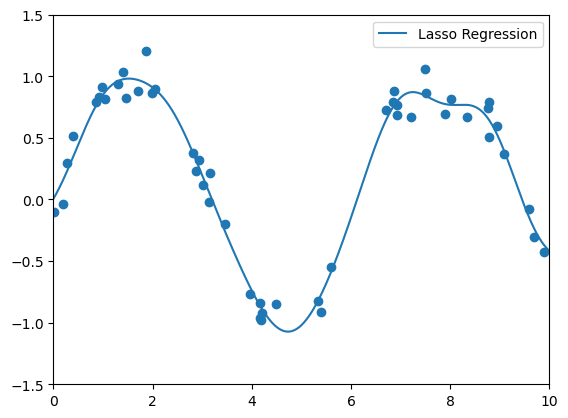

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline


model = make_pipeline(GaussianFeatures(30), 
                      Lasso(alpha=0.001, max_iter=5000))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), label="Lasso Regression")

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


# **Ridge Regression ($L_2$ Regularization) / Regresja grzbietowa ($L_2$ regularizacja)**

---

## **English version**

The most common form of regularization is often called **ridge regression** or **$L_2$ regularization** (sometimes also referred to as *Tikhonov regularization*). This approach penalizes the sum of squares (2-norms) of the model coefficients $\theta_n$. Specifically, the penalty term added to the cost function is:

$$
P = \alpha \sum_{n=1}^N \theta_n^2,
$$

where $\alpha$ is a free parameter controlling the strength of the penalty. In scikit-learn, this type of penalized model is readily available through the `Ridge` estimator.

---

## **Polish version**

Najczęściej stosowaną formą regularizacji jest tzw. **regresja grzbietowa** (ang. *ridge regression*) lub **regularizacja $L_2$** (nazywana też niekiedy *regularizacją Tichonowa*). Polega ona na karaniu (penalizacji) sumy kwadratów (normy drugiej) współczynników modelu $\theta_n$. Dokładniej, do funkcji kosztu dodawany jest następujący wyraz kary:

$$
P = \alpha \sum_{n=1}^N \theta_n^2,
$$

gdzie $\alpha$ jest parametrem regulującym siłę tej kary. W bibliotece scikit-learn ten rodzaj modelu z regularizacją jest zaimplementowany jako estimator `Ridge`.


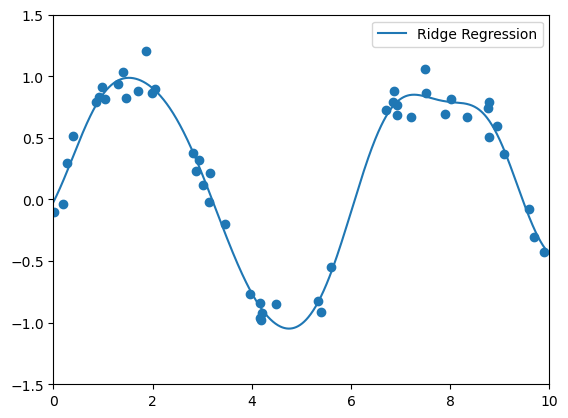

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline


model = make_pipeline(GaussianFeatures(30), 
                      Ridge(alpha=0.1, max_iter=5000))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), label="Ridge Regression")

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()
